In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from PIL import ImageGrab
import warnings
warnings.filterwarnings('ignore')

# Question 1

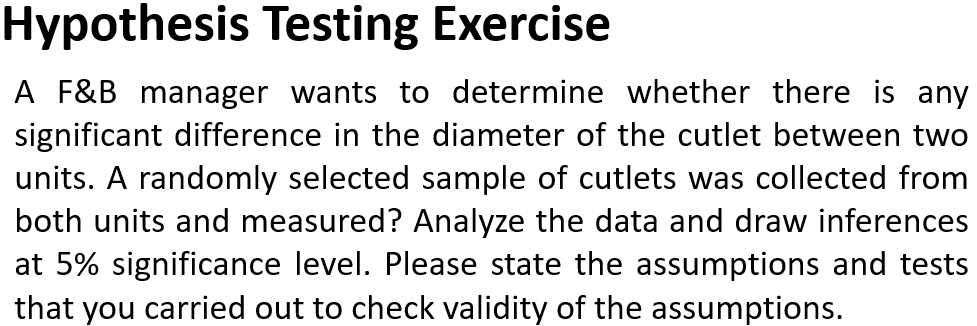

In [4]:
ImageGrab.grabclipboard()

### We are going to conduct a 2 tailed t-Test on 2 Independent samples with Numerical Data
#### We need to check whether the mean of both samples are different and
#### Is there any significance difference between the two samples?
### Step 1
#### Make two Hypothesis one contradicting to other
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$
+ **Alternative Hypthosis:** $\mu_1 \neq \mu_2$
### Step 2
#### Decide a cut-off value
+ **Significance 5%**
+ **alpha = 0.05**
#### As it is a two-tailed test
+ **alpha/2 = 0.025**
### Step 3
#### Importing Files

In [5]:
df = pd.read_csv('data/Cutlets.csv')

In [6]:
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


#### Descriptive Statistics

In [7]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


#### Checking Null Values

In [8]:
df.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

#### Checking for Duplicate Values

In [9]:
df[df.duplicated()]

,Unit A,Unit B


#### Checking the Data Type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


#### Ploting the Graphs

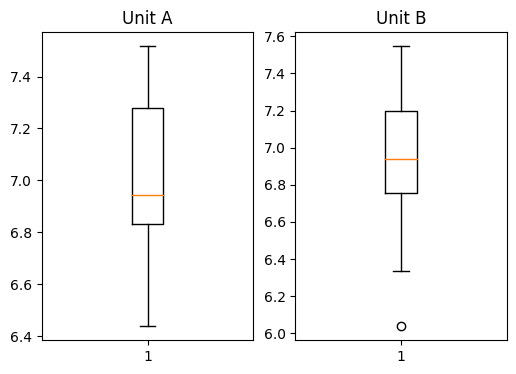

In [11]:
plt.subplots(figsize = (6,4))
plt.subplot(121)
plt.boxplot(df['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(df['Unit B'])
plt.title('Unit B')
plt.show()

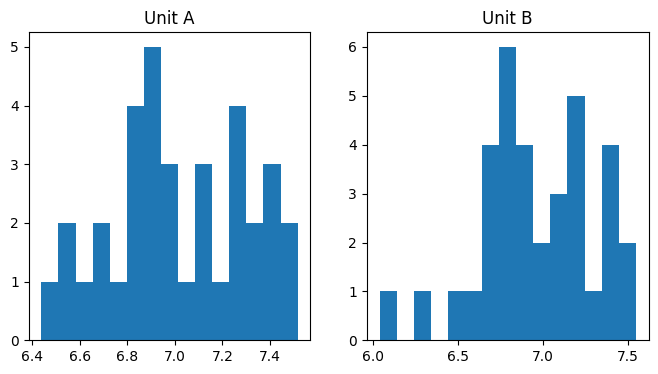

In [12]:
plt.subplots(figsize = (8,4))
plt.subplot(121)
plt.hist(df['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(df['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

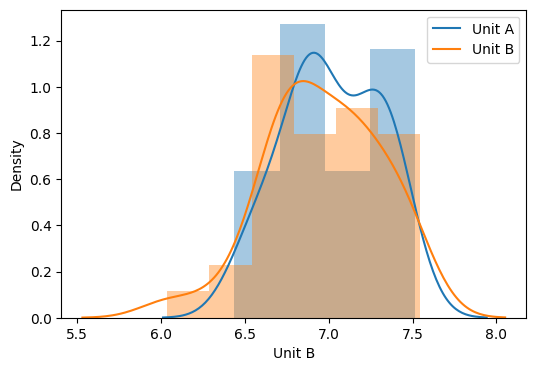

In [13]:
plt.figure(figsize = (6,4))
labels = ['Unit A', 'Unit B']
sns.distplot(df['Unit A'], kde = True)
sns.distplot(df['Unit B'],hist = True)
plt.legend(labels)

#### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

<Figure size 500x400 with 0 Axes>

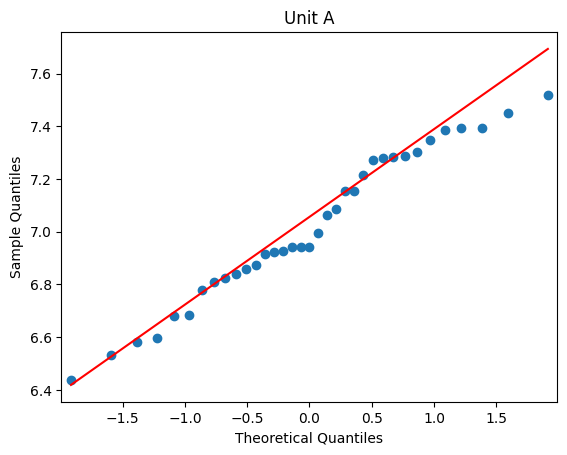

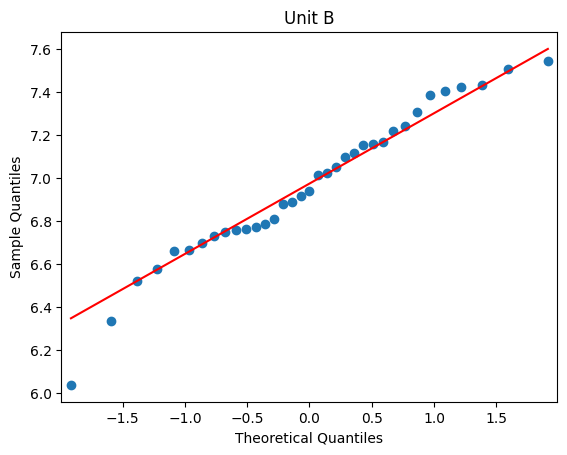

In [14]:
plt.figure(figsize = (5,4))
sm.qqplot(df["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(df["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

### Step 4
#### Compare Evidences with Hypothesis using t-statistics

In [15]:
statistic , p_value = stats.ttest_ind(df['Unit A'],df['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.47223947245995


### Compare p_value with '$\alpha$ '(Significane Level)
+ If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence
+ If p_value is = '$\alpha$ ' we reject Null Hypothesis
### Interpreting p-value

In [16]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


## Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples